/tmp/ipykernel_30560/1351317537.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/rossmann_store_sales/train.csv')


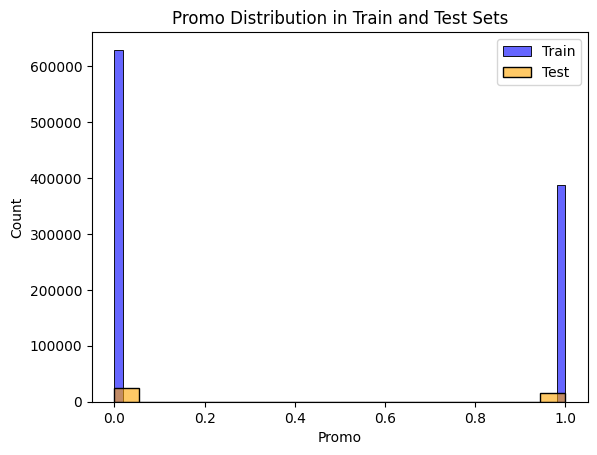

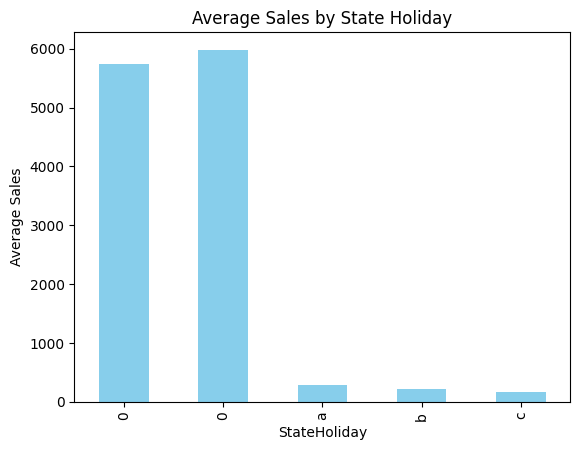

Average Sales by State Holiday:
 StateHoliday
0    5733.530624
0    5980.279717
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64


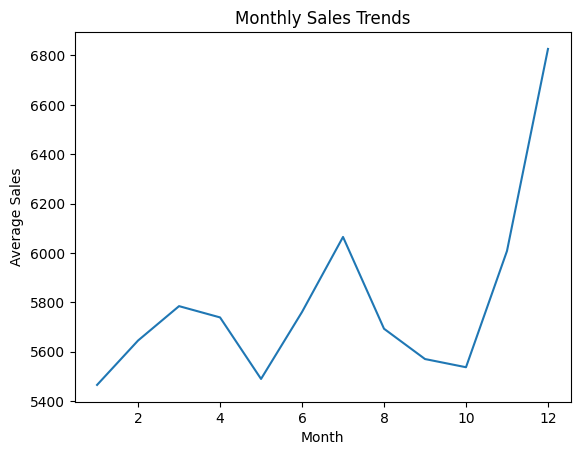

Average Monthly Sales:
 Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64


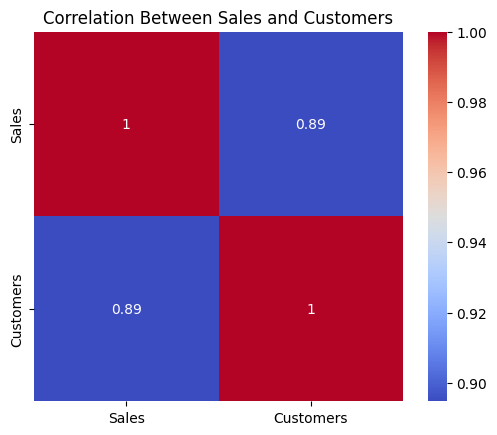

Correlation Between Sales and Customers:
               Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


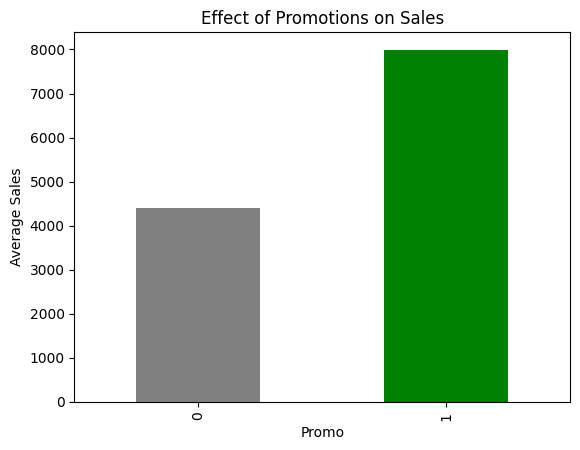

Effect of Promotions on Sales:
 Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


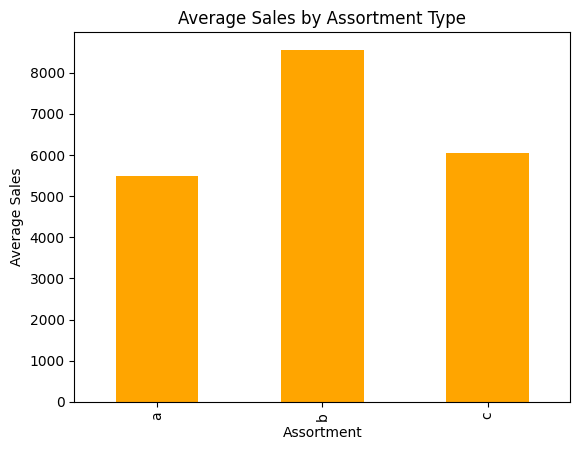

Average Sales by Assortment Type:
 Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


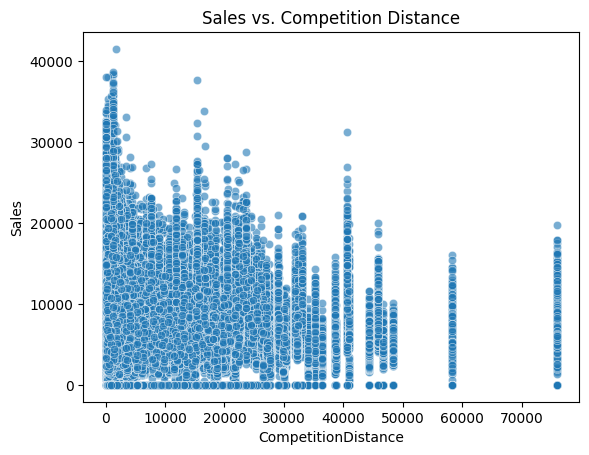

Effect of Competition Distance on Sales:
        CompetitionDistance         Sales
count         1.017209e+06  1.017209e+06
mean          5.430086e+03  5.773819e+03
std           7.705298e+03  3.849926e+03
min           2.000000e+01  0.000000e+00
25%           7.100000e+02  3.727000e+03
50%           2.330000e+03  5.744000e+03
75%           6.880000e+03  7.856000e+03
max           7.586000e+04  4.155100e+04


In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.impute import SimpleImputer

# Initialize logging
logging.basicConfig(
    filename='eda_log.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger()

# Load datasets
try:
    train = pd.read_csv('../data/rossmann_store_sales/train.csv')
    test = pd.read_csv('../data/rossmann_store_sales/test.csv')
    store = pd.read_csv('../data/rossmann_store_sales/store.csv')
    sample_submission = pd.read_csv('../data/rossmann_store_sales/sample_submission.csv')
    logger.info("Datasets loaded successfully.")
except Exception as e:
    logger.error(f"Error loading datasets: {e}")
    raise

# Merge datasets
try:
    train = train.merge(store, on='Store', how='left')
    test = test.merge(store, on='Store', how='left')
    logger.info("Train and test datasets merged with store dataset.")
except Exception as e:
    logger.error(f"Error merging datasets: {e}")
    raise

# Handle missing values
try:
    imputer = SimpleImputer(strategy='mean')
    train['CompetitionDistance'] = imputer.fit_transform(train[['CompetitionDistance']])
    logger.info("Missing values handled for CompetitionDistance.")
except Exception as e:
    logger.error(f"Error handling missing values: {e}")
    raise

# Exploratory Data Analysis
## Q1: Distribution of Promotions
try:
    sns.histplot(train['Promo'], label='Train', kde=False, color='blue', alpha=0.6)
    sns.histplot(test['Promo'], label='Test', kde=False, color='orange', alpha=0.6)
    plt.legend()
    plt.title('Promo Distribution in Train and Test Sets')
    plt.show()
    logger.info("Plotted Promo distribution comparison.")
except Exception as e:
    logger.error(f"Error in Promo distribution visualization: {e}")

## Q2: Sales Before, During, and After Holidays
try:
    holiday_sales = train.groupby('StateHoliday')['Sales'].mean()
    holiday_sales.plot(kind='bar', color='skyblue', title='Average Sales by State Holiday')
    plt.ylabel('Average Sales')
    plt.show()
    print("Average Sales by State Holiday:\n", holiday_sales)
    logger.info("Analyzed sales before, during, and after holidays.")
except Exception as e:
    logger.error(f"Error analyzing sales during holidays: {e}")

## Q3: Seasonal Purchase Behaviors
try:
    train['Month'] = pd.to_datetime(train['Date']).dt.month
    monthly_sales = train.groupby('Month')['Sales'].mean()
    monthly_sales.plot(kind='line', title='Monthly Sales Trends')
    plt.ylabel('Average Sales')
    plt.show()
    print("Average Monthly Sales:\n", monthly_sales)
    logger.info("Examined seasonal purchase behaviors.")
except Exception as e:
    logger.error(f"Error examining seasonal trends: {e}")

## Q4: Correlation Between Sales and Customers
try:
    correlation = train[['Sales', 'Customers']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Between Sales and Customers')
    plt.show()
    print("Correlation Between Sales and Customers:\n", correlation)
    logger.info("Checked correlation between sales and customers.")
except Exception as e:
    logger.error(f"Error in correlation analysis: {e}")

## Q5: Effectiveness of Promotions
try:
    promo_sales = train.groupby('Promo')['Sales'].mean()
    promo_sales.plot(kind='bar', color=['gray', 'green'], title='Effect of Promotions on Sales')
    plt.ylabel('Average Sales')
    plt.show()
    print("Effect of Promotions on Sales:\n", promo_sales)
    logger.info("Explored the effect of promotions on sales.")
except Exception as e:
    logger.error(f"Error analyzing promo effectiveness: {e}")

## Q6: Store Characteristics (Assortment, Competitor Distance)
try:
    assortment_sales = train.groupby('Assortment')['Sales'].mean()
    assortment_sales.plot(kind='bar', title='Average Sales by Assortment Type', color='orange')
    plt.ylabel('Average Sales')
    plt.show()
    print("Average Sales by Assortment Type:\n", assortment_sales)

    sns.scatterplot(data=train, x='CompetitionDistance', y='Sales', alpha=0.6)
    plt.title('Sales vs. Competition Distance')
    plt.show()
    print("Effect of Competition Distance on Sales:\n", train[['CompetitionDistance', 'Sales']].describe())
    logger.info("Checked the effect of competitor distance on sales.")
except Exception as e:
    logger.error(f"Error analyzing store characteristics: {e}")

# Conclusion
logger.info("Exploratory Data Analysis completed.")
